## Classification of DD dataset's proteins using TSVM and ACC features

### Read dataset

In [1]:
import pandas as pd

dd_dataset = pd.read_csv('../dataset/dd_ACC_num.csv')
dd_dataset.head()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,class labels,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F1591,F1592,F1593,F1594,F1595,F1596,F1597,F1598,F1599,F1600
0,0,0.793873,-3.081755e-02,0.064096,-0.278083,0.512932,-0.041347,0.165949,1.575439,0.207791,...,0.472132,0.170672,-0.218105,-0.170188,0.349094,-0.134711,0.038802,-0.288539,-0.154789,-0.047447
1,0,0.875325,-9.067278e-03,-0.157973,-0.037824,-0.096289,-0.600570,-0.038737,-0.059022,0.940049,...,0.560130,0.158264,0.321806,-0.061033,-0.141472,-0.118656,-0.194835,-0.168613,-0.201502,0.559921
2,0,0.125819,-1.781493e-03,0.145366,-0.101477,0.071309,-0.206604,-0.007126,-0.007126,-0.234833,...,-0.014928,-0.010667,-0.012827,-0.005574,-0.009291,-0.003234,-0.019719,-0.010969,-0.013007,-0.007433
3,0,0.494363,-2.093698e-03,-0.143159,-0.102345,-0.048332,-0.504646,0.173782,-0.166912,-0.084326,...,0.231198,-0.039521,-0.023178,-0.023070,-0.051187,-0.023942,0.219130,-0.019667,-0.086914,-0.015961
4,0,-0.872793,9.482830e-29,-0.247875,-0.822224,-0.300076,-0.207240,-0.050007,0.256775,0.398850,...,-0.103157,-0.021785,0.091978,-0.050952,-0.077002,-0.056616,0.062953,-0.069314,0.162716,0.218462


### Split features and labels

In [2]:
X_train = dd_dataset[['F%d' % i for i in range(1, dd_dataset.shape[1])]].values
y_train = dd_dataset['class labels'].values
y_train.shape

(311,)

### Load TSVM model

In [8]:
import sys
sys.path.insert(0, '.../src')

import tsvm
from joblib import load


tsvm_model = load('../tsvm/tsvm_dd_acc_best_model.joblib')

### Predict data with pre-trained model

In [10]:
y_pred = tsvm_model.predict(X_train)

### Evaluation

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Best score: %.2f" % (accuracy_score(y_train, y_pred) * 100))

Best score: 69.45


### Confusion matrix

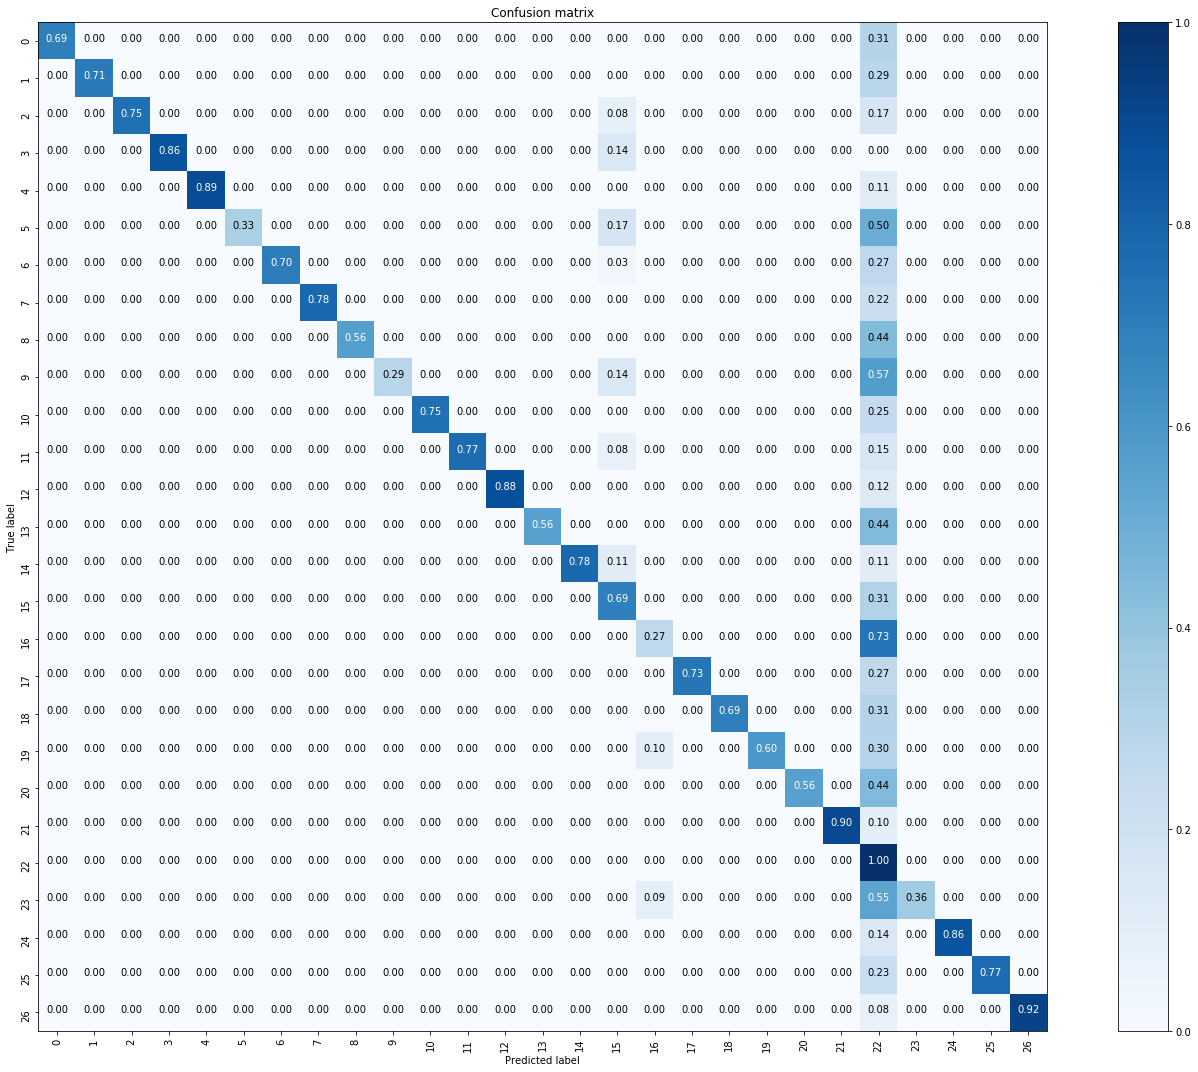

In [17]:
from misc import plt_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_train, y_pred)

plt.figure(figsize=(20, 15))
plt_confusion_matrix(cm, np.unique(y_train))

### Classification report

In [18]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.69      0.82        13
          1       1.00      0.71      0.83         7
          2       1.00      0.75      0.86        12
          3       1.00      0.86      0.92         7
          4       1.00      0.89      0.94         9
          5       1.00      0.33      0.50         6
          6       1.00      0.70      0.82        30
          7       1.00      0.78      0.88         9
          8       1.00      0.56      0.72        16
          9       1.00      0.29      0.44         7
         10       1.00      0.75      0.86         8
         11       1.00      0.77      0.87        13
         12       1.00      0.88      0.93         8
         13       1.00      0.56      0.71         9
         14       1.00      0.78      0.88         9
         15       0.74      0.69      0.71        29
         16       0.60      0.27      0.37        11
         17       1.00      0.73      0.84   